# 📊 Análisis Descriptivo y de Calidad de Datos

El objetivo de este cuaderno es realizar un Análisis Exploratorio de Datos (EDA) para comprender la distribución, la tendencia, la estacionalidad y la calidad de nuestras dos variables principales: Temp_Maxima_C y Temp_Minima_C.

Utilizaremos herramientas estadísticas y de visualización clave para series de tiempo, como la media móvil y los diagramas de caja (Boxplots).

### 1. Configuración e Importación de Datos Limpios

Cargamos el DataFrame que generamos en la fase de limpieza. Es crucial que carguemos el archivo CSV limpio, ya que este ya tiene el índice de fecha configurado y no tiene duplicados ni huecos estructurales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos de gráficos para mejor visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6) # Tamaño estándar para gráficos

# 1. Cargar el DataFrame limpio
# 'index_col=0' le dice a Pandas que la primera columna debe usarse como índice.
# 'parse_dates=True' le asegura que interprete ese índice como fechas.
try:
    df = pd.read_csv("dataset/pinar_del_rio_temperaturas_LIMPIO_FINAL.csv", index_col=0, parse_dates=True)
    print("✅ Datos limpios cargados exitosamente.")
except FileNotFoundError:
    print("❌ ERROR: Asegúrate de haber guardado el archivo 'pinar_del_rio_temperaturas_LIMPIO_FINAL.csv' en el notebook anterior.")
    df = pd.DataFrame() # Creamos un DataFrame vacío para no detener el notebook

# Verificar las primeras filas
if not df.empty:
    print("\nPrimeras filas del dataset:")
    print(df.head())

✅ Datos limpios cargados exitosamente.

Primeras filas del dataset:
            Temp_Maxima_C  Temp_Minima_C
Fecha                                   
2024-01-01           24.1           13.1
2024-01-02           24.2           13.7
2024-01-03           23.2           15.0
2024-01-04           27.2           15.6
2024-01-05           25.8           17.0


## 2. Análisis Descriptivo de Temp_Maxima_C (Temperatura Máxima)

### 2.1. Resumen Estadístico (.describe())

El método .describe() nos da una visión rápida y numérica de la distribución de la variable: la media (promedio), la desviación estándar (dispersión), y los cuartiles (percentiles 25, 50 y 75).

In [5]:
print("Resumen Estadístico de la Temperatura Máxima:")
df['Temp_Maxima_C'].describe()

Resumen Estadístico de la Temperatura Máxima:


count    671.000000
mean      30.076751
std        2.422173
min       21.300000
25%       28.700000
50%       30.300000
75%       32.000000
max       35.000000
Name: Temp_Maxima_C, dtype: float64

### 3.2. Visualización de la Serie de Tiempo y Media Móvil

La visualización es el paso más importante. Graficar la serie nos permite ver la Tendencia y la Estacionalidad a lo largo del tiempo.

La Media Móvil (o Rolling Average) es una técnica de suavizado que nos ayuda a eliminar el ruido diario y ver la tendencia subyacente. Usaremos una ventana de 7 días para capturar la tendencia semanal.

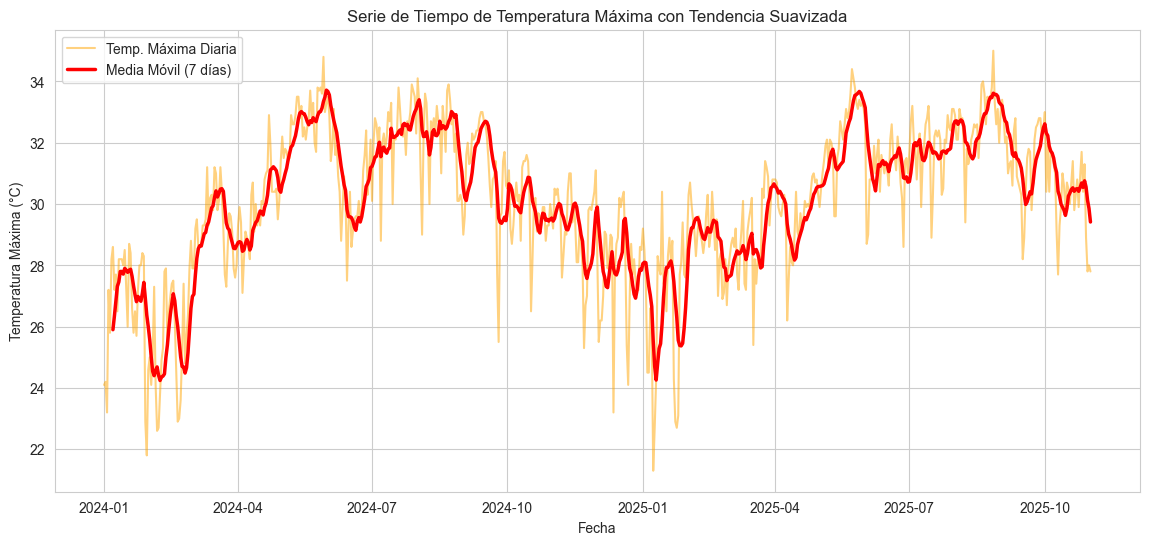

In [6]:
# 1. Calcular la Media Móvil (Rolling Average) de 7 días
# .rolling(window=7): toma el promedio de los últimos 7 días.
# .mean(): calcula el promedio.
df['Max_Rolling_7d'] = df['Temp_Maxima_C'].rolling(window=7).mean()

# 2. Generar el gráfico
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Temp_Maxima_C'], label='Temp. Máxima Diaria', alpha=0.5, color='orange')
plt.plot(df.index, df['Max_Rolling_7d'], label='Media Móvil (7 días)', color='red', linewidth=2.5)
plt.title('Serie de Tiempo de Temperatura Máxima con Tendencia Suavizada')
plt.xlabel("Fecha")
plt.ylabel("Temperatura Máxima (°C)")
plt.legend()
plt.show()


### 3.3. Detección de Outliers (Boxplot)

Un Boxplot (Diagrama de Caja) utiliza los cuartiles para dibujar una "caja" y extender "bigotes". Los puntos que caen fuera de los bigotes son considerados outliers estadísticos.


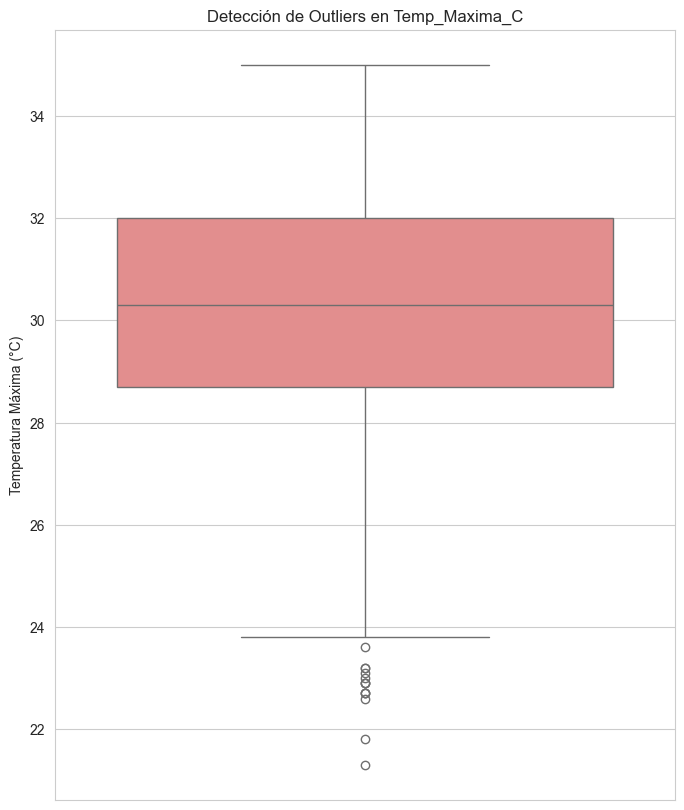


--- Conteo de Outliers en Temp_Maxima_C ---
Q1 (Percentil 25): 28.70°C
Q3 (Percentil 75): 32.00°C
Rango Intercuartílico (IQR): 3.30°C
Límite Superior: 36.95°C
Límite Inferior: 23.75°C

Número de Outliers Superiores (días calurosos): 0
Número de Outliers Inferiores (días fríos): 14
TOTAL de Outliers detectados: 14 días.


In [13]:
# 1. Gráfico Boxplot
plt.figure(figsize=(8, 10))
sns.boxplot(y=df['Temp_Maxima_C'], color='lightcoral')
plt.title('Detección de Outliers en Temp_Maxima_C')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()


# 2. Conteo Numérico de Outliers (usando IQR)
Q1 = df['Temp_Maxima_C'].quantile(0.25)
Q3 = df['Temp_Maxima_C'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Contamos outliers superiores (Olas de calor) e inferiores (Días fríos inesperados)
outliers_superiores = df[df['Temp_Maxima_C'] > limite_superior]
outliers_inferiores = df[df['Temp_Maxima_C'] < limite_inferior]
total_outliers = len(outliers_superiores) + len(outliers_inferiores)

print(f"\n--- Conteo de Outliers en Temp_Maxima_C ---")
print(f"Q1 (Percentil 25): {Q1:.2f}°C")
print(f"Q3 (Percentil 75): {Q3:.2f}°C")
print(f"Rango Intercuartílico (IQR): {IQR:.2f}°C")
print(f"Límite Superior: {limite_superior:.2f}°C")
print(f"Límite Inferior: {limite_inferior:.2f}°C")
print(f"\nNúmero de Outliers Superiores (días calurosos): {len(outliers_superiores)}")
print(f"Número de Outliers Inferiores (días fríos): {len(outliers_inferiores)}")
print(f"TOTAL de Outliers detectados: {total_outliers} días.")



## 4. Análisis Descriptivo de Temp_Minima_C (Temperatura Mínima)

Repetimos el mismo proceso para la temperatura mínima, ya que su distribución y comportamiento pueden ser muy diferentes.

### 4.1. Resumen Estadístico (.describe())

In [8]:
print("Resumen Estadístico de la Temperatura Mínima:")
df['Temp_Minima_C'].describe()

Resumen Estadístico de la Temperatura Mínima:


count    671.000000
mean      21.957973
std        2.810921
min       12.800000
25%       20.350000
50%       22.900000
75%       24.200000
max       27.000000
Name: Temp_Minima_C, dtype: float64

### 4.2. Visualización de la Serie de Tiempo y Media Móvil

La media móvil de 7 días nos ayudará a ver la tendencia de las mínimas y si hay periodos de "olas de frío" (mínimas muy bajas) o "noches tropicales" (mínimas muy altas).

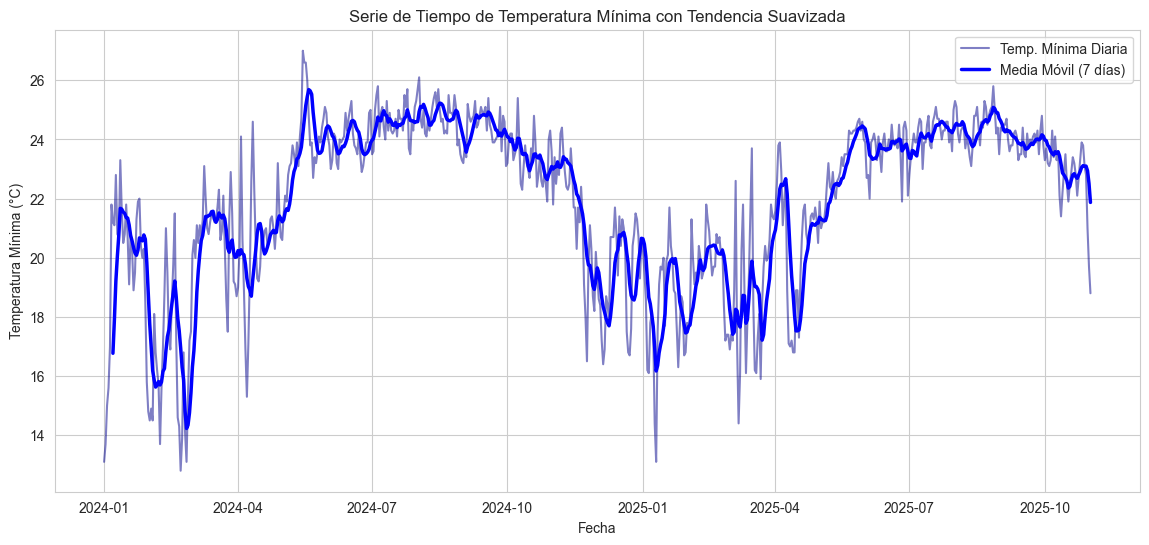

In [9]:
# 1. Calcular la Media Móvil (Rolling Average) de 7 días
df['Min_Rolling_7d'] = df['Temp_Minima_C'].rolling(window=7).mean()

# 2. Generar el gráfico
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Temp_Minima_C'], label='Temp. Mínima Diaria', alpha=0.5, color='darkblue')
plt.plot(df.index, df['Min_Rolling_7d'], label='Media Móvil (7 días)', color='blue', linewidth=2.5)
plt.title('Serie de Tiempo de Temperatura Mínima con Tendencia Suavizada')
plt.xlabel("Fecha")
plt.ylabel("Temperatura Mínima (°C)")
plt.legend()
plt.show()

### 4.3. Detección de Outliers (Boxplot)

Para la temperatura mínima, los outliers más relevantes suelen ser aquellos en el límite inferior (días inusualmente fríos).

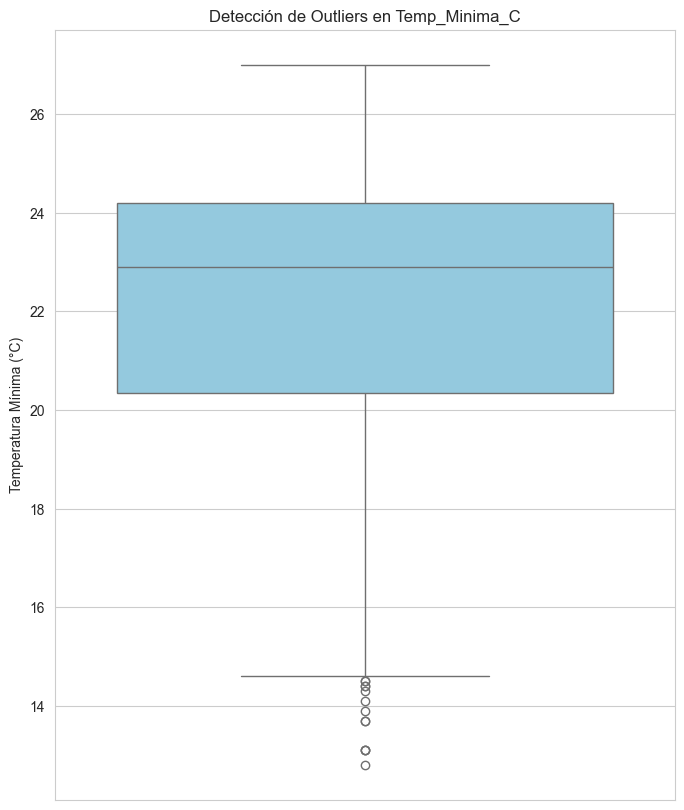


--- Conteo de Outliers en Temp_Minima_C ---
Q1 (Percentil 25): 20.35°C
Q3 (Percentil 75): 24.20°C
Rango Intercuartílico (IQR): 3.85°C
Límite Superior: 29.97°C
Límite Inferior: 14.58°C

Número de Outliers Superiores (noches cálidas): 0
Número de Outliers Inferiores (días fríos): 13
TOTAL de Outliers detectados: 13 días.


In [15]:
# 1. Gráfico Boxplot
plt.figure(figsize=(8, 10))
sns.boxplot(y=df['Temp_Minima_C'], color='skyblue')
plt.title('Detección de Outliers en Temp_Minima_C')
plt.ylabel('Temperatura Mínima (°C)')
plt.show()


# 2. Conteo Numérico de Outliers (usando IQR)
Q1_min = df['Temp_Minima_C'].quantile(0.25)
Q3_min = df['Temp_Minima_C'].quantile(0.75)
IQR_min = Q3_min - Q1_min

limite_superior_min = Q3_min + 1.5 * IQR_min
limite_inferior_min = Q1_min - 1.5 * IQR_min

# Contamos outliers superiores e inferiores
outliers_superiores_min = df[df['Temp_Minima_C'] > limite_superior_min]
outliers_inferiores_min = df[df['Temp_Minima_C'] < limite_inferior_min]
total_outliers_min = len(outliers_superiores_min) + len(outliers_inferiores_min)

print(f"\n--- Conteo de Outliers en Temp_Minima_C ---")
print(f"Q1 (Percentil 25): {Q1_min:.2f}°C")
print(f"Q3 (Percentil 75): {Q3_min:.2f}°C")
print(f"Rango Intercuartílico (IQR): {IQR_min:.2f}°C")
print(f"Límite Superior: {limite_superior_min:.2f}°C")
print(f"Límite Inferior: {limite_inferior_min:.2f}°C")
print(f"\nNúmero de Outliers Superiores (noches cálidas): {len(outliers_superiores_min)}")
print(f"Número de Outliers Inferiores (días fríos): {len(outliers_inferiores_min)}")
print(f"TOTAL de Outliers detectados: {total_outliers_min} días.")




# 📝 Resumen de Observaciones Clave 

Tras el análisis descriptivo de las variables de temperatura, se han extraído las siguientes conclusiones fundamentales que guiarán las decisiones en la próxima fase de modelado.

## 1. Conclusiones Generales

| Aspecto Analizado | `Temp_Maxima_C` | `Temp_Minima_C` | Implicación para un futuro Modelo | 
| :--- | :--- | :--- | :--- | 
| **Media (Promedio)** | Promedio Aprox.  30.0 °C | Promedio Aprox. 21.95 °C | Valores esperados de referencia. | 
| **Desviación Estándar** |  2.42 °C |  2.81 °C | Ambas series son relativamente estables, pero la variabilidad de las mínimas es casi igual a las máximas, indicando fluctuaciones significativas de noche (dispersión similar). | 
| **Tendencia** | Clara tendencia **ascendente** a largo plazo (por Media Móvil de 7 días). | Clara tendencia **ascendente** a largo plazo (por Media Móvil de 7 días). | El modelo debe incorporar la tendencia mediante una **diferenciación** o la inclusión de una variable de tiempo. | 
| **Estacionalidad** | Clara estacionalidad anual (veranos calientes, inviernos fríos). | Clara estacionalidad anual. | Es obligatorio aplicar un modelo que capture ciclos estacionales (ej: SARIMA). | 


## 2. Conclusiones sobre la Calidad de los Datos (Outliers)

Se utilizó la regla del Rango Intercuartílico (IQR) para detectar *outliers* atípicos. **Según los resultados del conteo, solo se detectaron *outliers* en el límite inferior.**

| Variable | Tipo de Outlier | Significado | Implicación Analítica | 
| :--- | :--- | :--- | :--- | 
| **Temp. Máxima** | **Inferiores** (14 días) | Días inusualmente fríos fuera de la temporada normal. | Confirman los puntos bajos atípicos. Se recomienda **mantenerlos** en el dataset para capturar la variabilidad completa. |
| **Temp. Mínima** | **Inferiores** (13 días) | Noches más frías o frentes fríos críticos (posible riesgo de heladas). | Son cruciales para alertas y precisión del modelo en eventos de frío. Se recomienda **mantenerlos**. |
| **Ausencia de Superiores** | *Máxima y Mínima* | Implica que no se han registrado oficialmente olas de calor/noches tropicales atípicas según la regla 1.5 IQR en el periodo analizado. | La ausencia de estos eventos simplifica el modelado de los extremos superiores. |

**Decisión Final:** Los *outliers* detectados (todos inferiores) son eventos meteorológicos reales y no errores de entrada de datos. Se mantienen en la serie para que el modelo predictivo pueda aprender a reconocer y anticipar eventos extremos de frío.
